In [1]:
# Importing packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression, Lasso,Ridge,ElasticNet
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, make_scorer, precision_score, r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, KFold, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_blobs
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression, LogisticRegressionCV

from sklearn import feature_selection as fs
from sklearn.preprocessing import PowerTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from scipy import stats

In [2]:
abalone_data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/abalone.csv')

In [3]:
abalone_data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
abalone_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [5]:
abalone_data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [6]:
abalone_data.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [7]:
#Exploratory Data Analysis (EDA) Scatterplot:

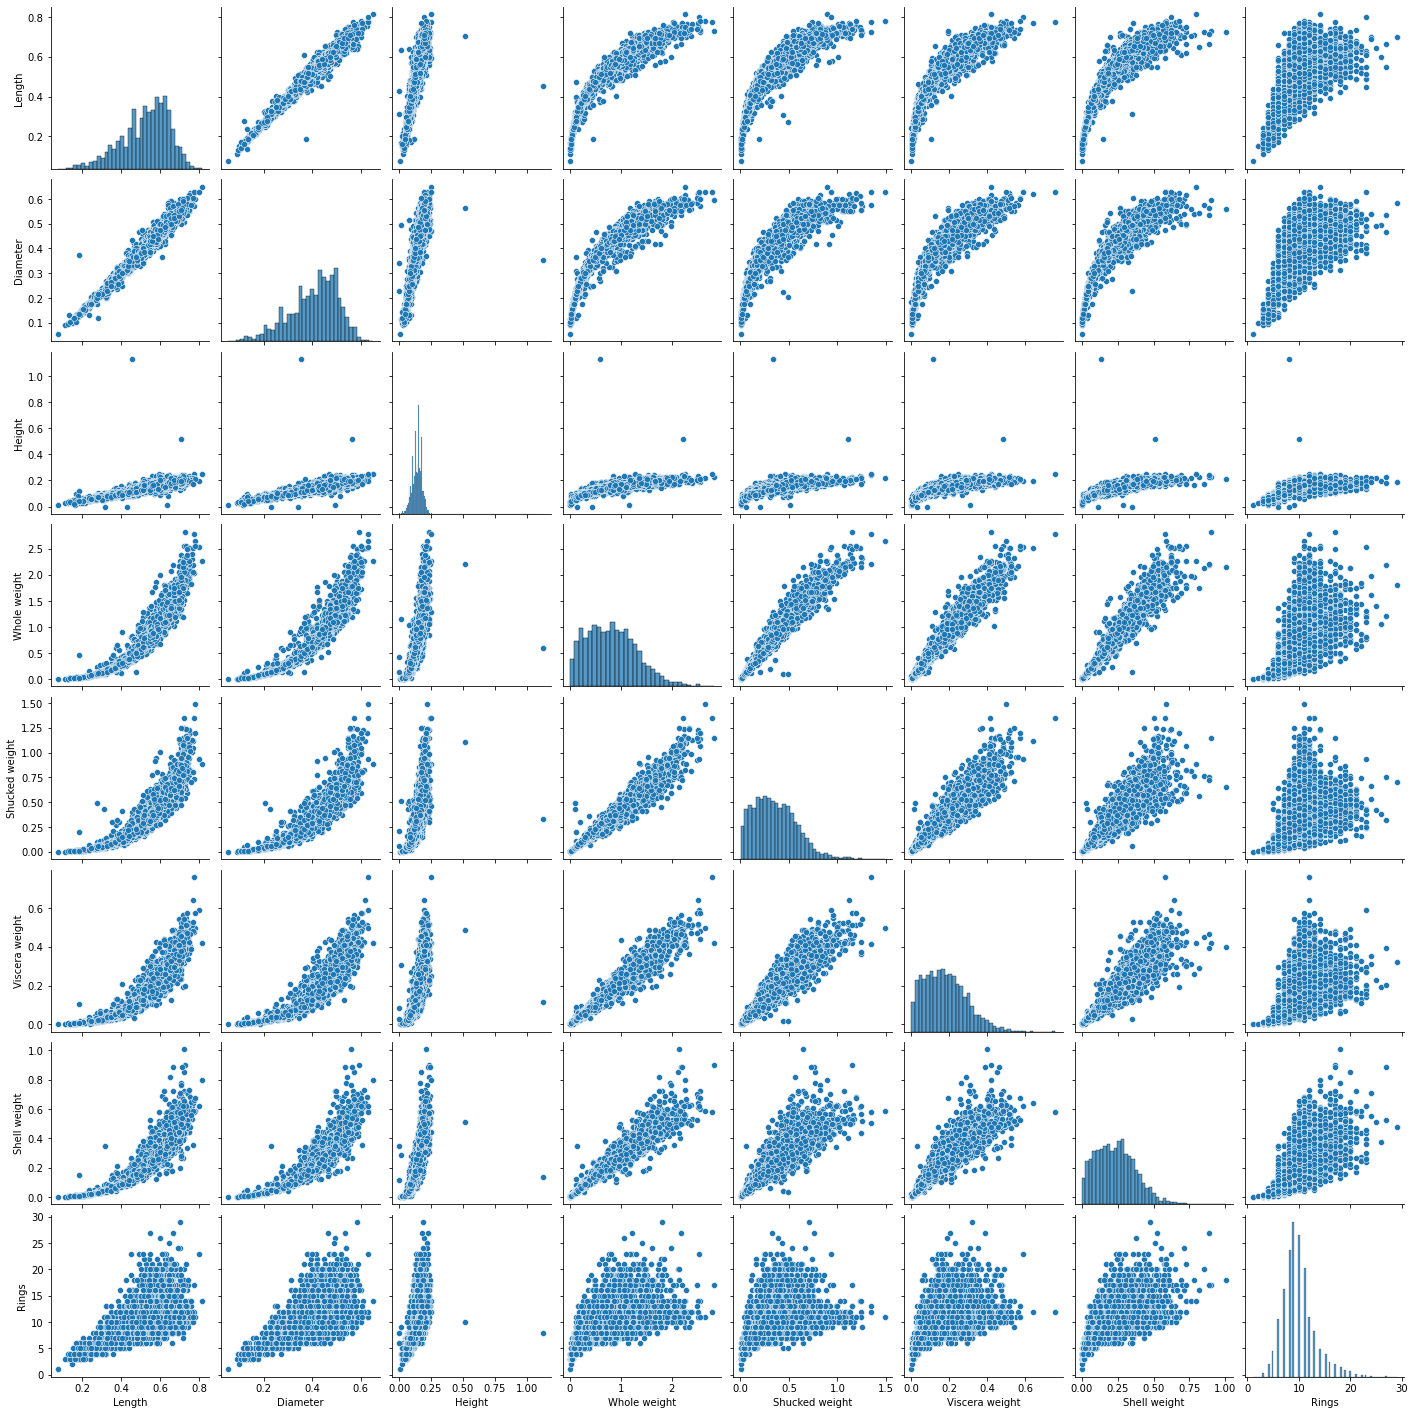

In [8]:
sns.pairplot(abalone_data)

In [9]:
#The pairplot gives us a visualization on scatter plot. Almost all the independant variables seem to have a positive relationship with Rings our target

<AxesSubplot:>

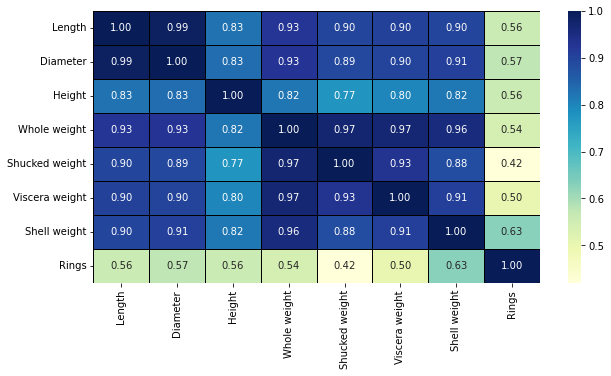

In [10]:
plt.figure(figsize = (10,5))
sns.heatmap(abalone_data.corr(), annot = True, linewidths=0.5, linecolor  = "black", fmt='.2f',cmap = 'YlGnBu')

In [11]:
i = 0
x1= abalone_data.drop(['Rings','Sex'],axis=1)
y1= abalone_data['Rings']

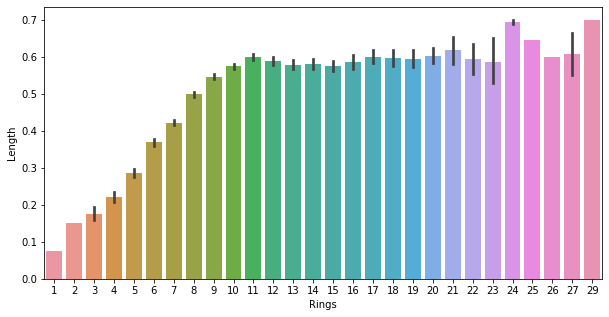

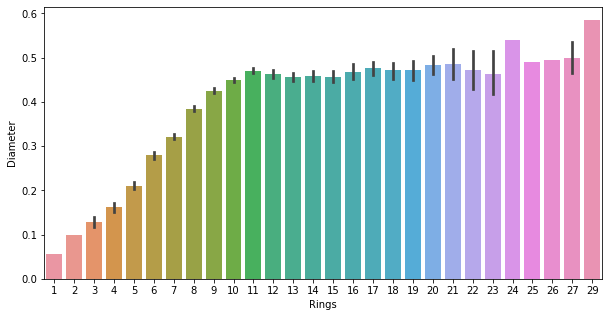

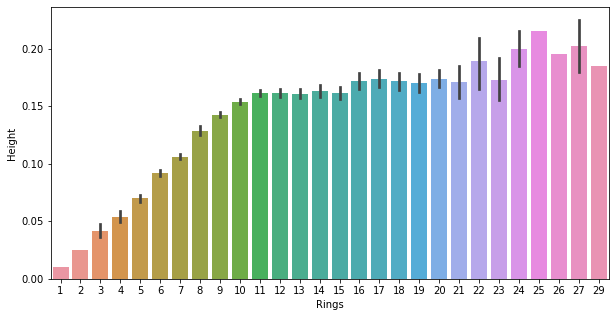

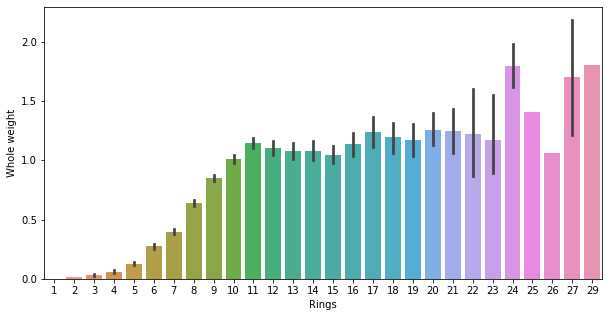

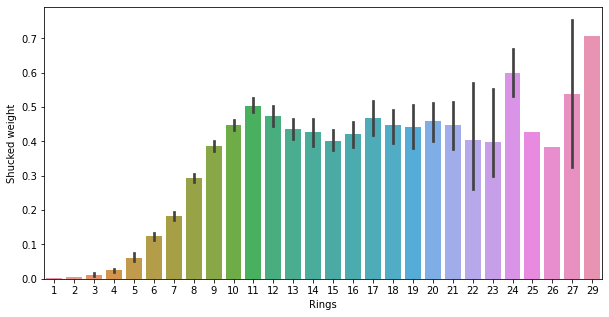

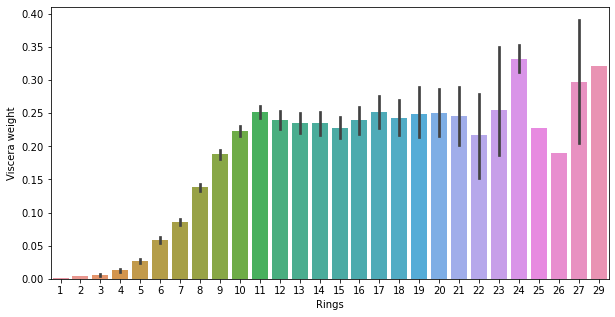

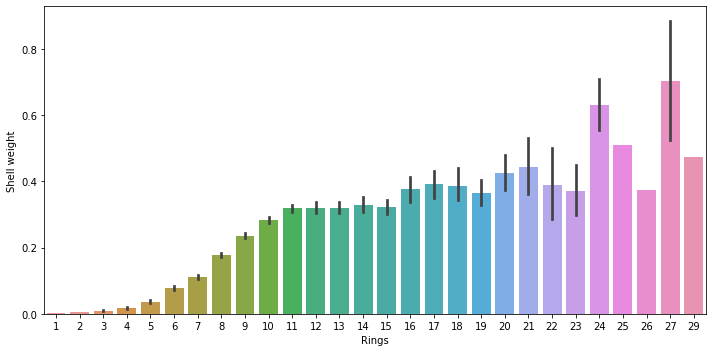

In [12]:
for col in x1.items():
    plt.figure(figsize=(10,5))
    sns.barplot(x=y1,y=col[i],data=abalone_data)
plt.tight_layout()
plt.show()

In [13]:
#All the independant variables seem to have a positive relationship with Rings till rings 1-11 and afterwards seem to have constant or uneven pattern.

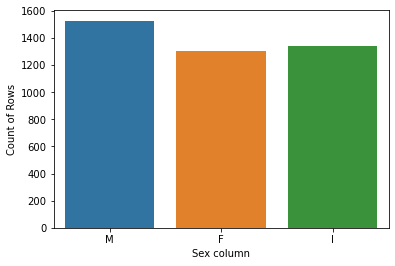

In [14]:
plt.figure(figsize=(6,4))
sns.countplot(x ='Sex',data=abalone_data)
plt.xlabel('Sex column')
plt.ylabel('Count of Rows')
plt.show()

In [15]:
#Looking at the count plot there is not much data imbalance comparing the 3 categories.

In [16]:
le = LabelEncoder()

In [17]:
abalone_data['Sex']=le.fit_transform(abalone_data['Sex'])
abalone_data

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [18]:
le.inverse_transform([0,1,2])

array(['F', 'I', 'M'], dtype=object)

In [19]:
abalone_data['Sex'].value_counts()

2    1528
1    1342
0    1307
Name: Sex, dtype: int64

In [20]:
#The categorical values have been encoded into 0,1 and 2 numerical data.
#where 0 - Female , 1 - Infant and 2 - Male

In [21]:
abalone_data.corr()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Sex,1.000000,-0.036066,-0.038874,-0.042077,-0.021391,-0.001373,-0.032067,-0.034854,-0.034627
Length,-0.036066,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,-0.038874,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,-0.042077,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,-0.021391,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,-0.001373,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,-0.032067,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,-0.034854,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,-0.034627,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


<AxesSubplot:>

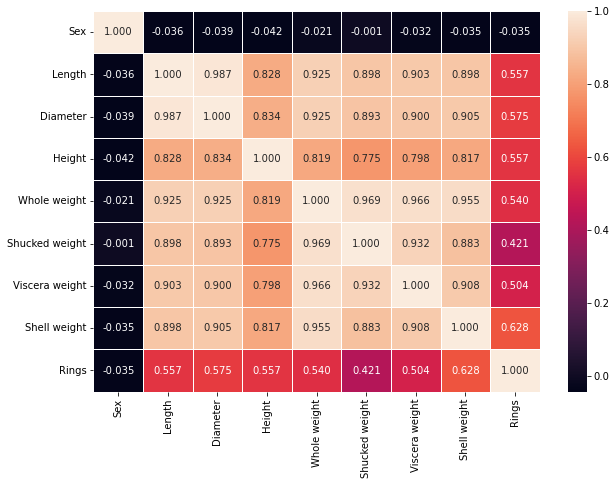

In [22]:
plt.figure(figsize=(10,7))
sns.heatmap(abalone_data.corr(), annot=True, linewidths=0.5, fmt='.3f')

In [23]:
abalone_data.corr()['Rings'].sort_values()

Sex              -0.034627
Shucked weight    0.420884
Viscera weight    0.503819
Whole weight      0.540390
Length            0.556720
Height            0.557467
Diameter          0.574660
Shell weight      0.627574
Rings             1.000000
Name: Rings, dtype: float64

In [24]:
#All the independant variables are showing high positive ccorrelation with the Rings target variable apart from 'Sex' Column which is a categorical encoded variable.

In [25]:
#Checking Outliers

Sex                  AxesSubplot(0.125,0.657941;0.168478x0.222059)
Length            AxesSubplot(0.327174,0.657941;0.168478x0.222059)
Diameter          AxesSubplot(0.529348,0.657941;0.168478x0.222059)
Height            AxesSubplot(0.731522,0.657941;0.168478x0.222059)
Whole weight         AxesSubplot(0.125,0.391471;0.168478x0.222059)
Shucked weight    AxesSubplot(0.327174,0.391471;0.168478x0.222059)
Viscera weight    AxesSubplot(0.529348,0.391471;0.168478x0.222059)
Shell weight      AxesSubplot(0.731522,0.391471;0.168478x0.222059)
Rings                   AxesSubplot(0.125,0.125;0.168478x0.222059)
dtype: object

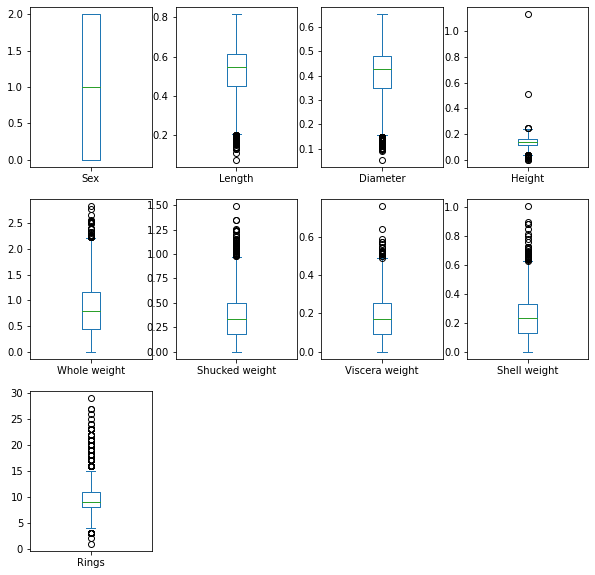

In [26]:
abalone_data.plot(kind='box',subplots=True,layout=(3,4),figsize=(10,10))

In [27]:
#Height, Rings high outliers are present

#Length, Whole weight, Shucked weight, Viscera weight, Shell weight moderate outliers are present

In [28]:
#Skewness Checking

<AxesSubplot:xlabel='Sex', ylabel='Density'>

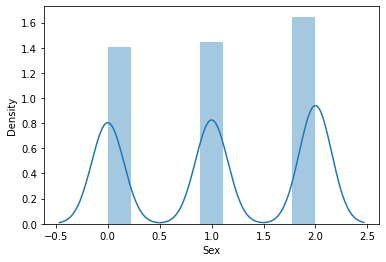

In [29]:
sns.distplot(abalone_data['Sex'])

<AxesSubplot:xlabel='Length', ylabel='Density'>

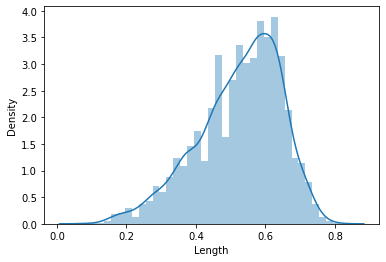

In [30]:
sns.distplot(abalone_data['Length'])

<AxesSubplot:xlabel='Diameter', ylabel='Density'>

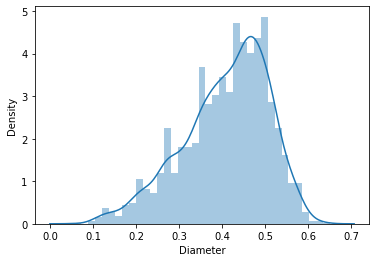

In [31]:
sns.distplot(abalone_data['Diameter'])

<AxesSubplot:xlabel='Height', ylabel='Density'>

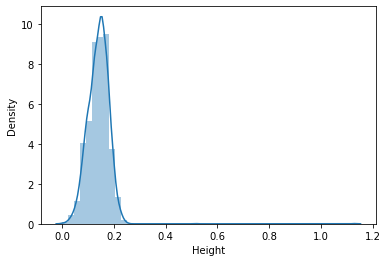

In [32]:
sns.distplot(abalone_data['Height'])

<AxesSubplot:xlabel='Whole weight', ylabel='Density'>

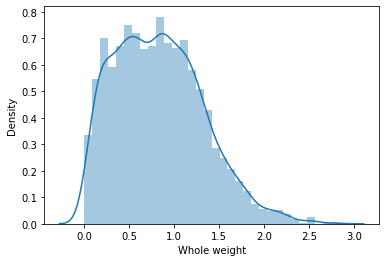

In [33]:
sns.distplot(abalone_data['Whole weight'])

<AxesSubplot:xlabel='Shucked weight', ylabel='Density'>

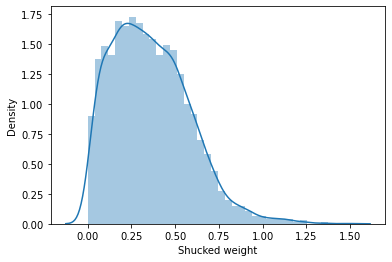

In [34]:
sns.distplot(abalone_data['Shucked weight'])

<AxesSubplot:xlabel='Viscera weight', ylabel='Density'>

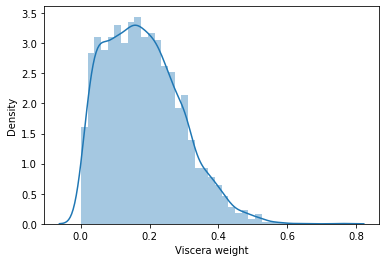

In [35]:
sns.distplot(abalone_data['Viscera weight'])

<AxesSubplot:xlabel='Shell weight', ylabel='Density'>

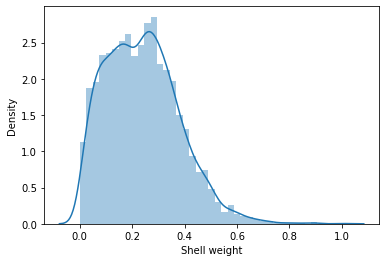

In [36]:
sns.distplot(abalone_data['Shell weight'])

<AxesSubplot:xlabel='Rings', ylabel='Density'>

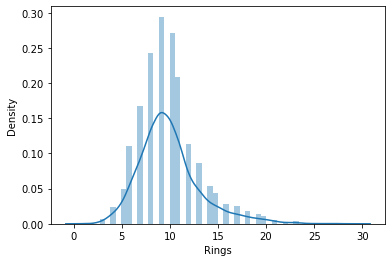

In [37]:
sns.distplot(abalone_data['Rings'])

In [38]:
#We can see that there is skewness due to the outliers

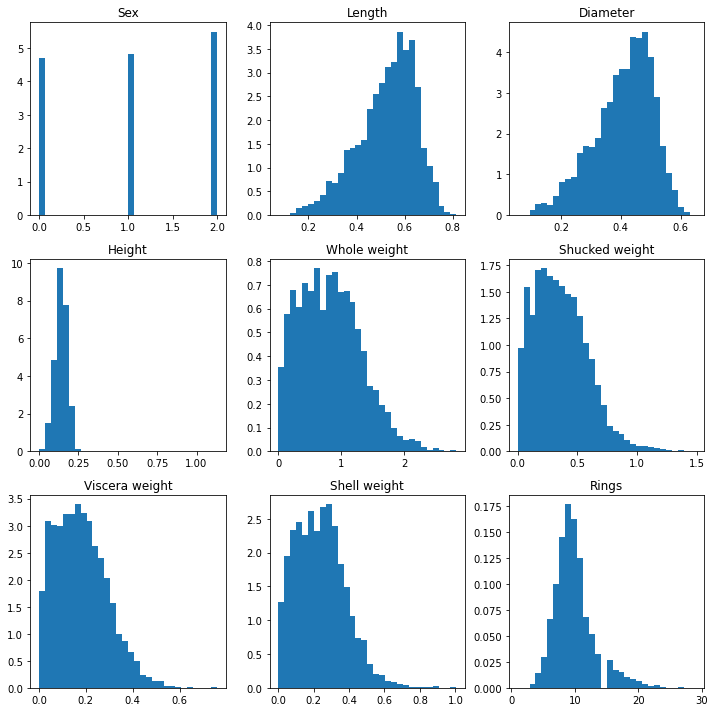

In [39]:
plt.rcParams['figure.figsize'] = (10,10)
abalone_data.hist(bins = 30, density = 'True', label = 'Value',histtype = 'stepfilled', grid=False)
plt.tight_layout()
plt.show()

In [40]:
#In histogram we can see if any section is empty such as in Rings 15 number there was not enough data collected also we can see the skewness.

In [41]:
abalone_data.skew()

Sex              -0.098155
Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
dtype: float64

In [42]:
#Skewness threshold usually taken as -0.5 to 0.5
#highly skewed :  Height, Rings
#moderately skewed : Length, Diameter, Whole weight, Shucked weight, Viscera weight, Shell weight 

In [43]:
abalone_data1=pd.DataFrame(data=abalone_data)       # copying the dataframe
abalone_data1

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [44]:
x1=abalone_data1.iloc[:,:-1]
y1=abalone_data1.iloc[:,-1]

In [45]:
x1.shape

(4177, 8)

In [46]:
y1.shape

(4177,)

In [47]:
x1.shape[1]

8

In [48]:
def calc_vif(x1):
    vif=pd.DataFrame()
    vif["variables"]=x1.columns
    vif["VIF FACTOR"]=[variance_inflation_factor(x1.values,i) for i in range(x1.shape[1])]
    return(vif)

In [49]:
calc_vif(x1)

,variables,VIF FACTOR
0,Sex,2.555356
1,Length,700.488988
2,Diameter,749.121626
3,Height,42.128924
4,Whole weight,421.652484
5,Shucked weight,101.674946
6,Viscera weight,63.585627
7,Shell weight,81.873737


In [50]:
#in between length and diameter in corr heatmap length is giving less contribution hence it is dropped in VIF

In [51]:
x1=abalone_data1.drop(['Length'],axis=1)
calc_vif(x1)

,variables,VIF FACTOR
0,Sex,2.545465
1,Diameter,62.345278
2,Height,42.686825
3,Whole weight,435.305438
4,Shucked weight,117.303502
5,Viscera weight,64.541685
6,Shell weight,81.720804
7,Rings,21.594824


In [52]:
#in between whole weight and shucked weight in corr heatmap shucked weight is giving less contribution hence it is dropped in VIF

In [53]:
x1=abalone_data1.drop(['Length','Shucked weight'],axis=1)
calc_vif(x1)

,variables,VIF FACTOR
0,Sex,2.537687
1,Diameter,58.307130
2,Height,42.683678
3,Whole weight,131.971592
4,Viscera weight,59.346850
5,Shell weight,57.219277
6,Rings,18.686253


In [54]:
#From the above after removal of length and shucked weight we can see that the VIF decreases drastically. Although VIF is still high in the other columns we will need the other columns to predict the label Rings (Age) in our dataset

In [55]:
#Data Preprocessing : Data cleaning

In [56]:
abalone_data.drop(['Length','Shucked weight'],axis=1,inplace=True)
abalone_data

,Sex,Diameter,Height,Whole weight,Viscera weight,Shell weight,Rings
0,2,0.365,0.095,0.5140,0.1010,0.1500,15
1,2,0.265,0.090,0.2255,0.0485,0.0700,7
2,0,0.420,0.135,0.6770,0.1415,0.2100,9
3,2,0.365,0.125,0.5160,0.1140,0.1550,10
4,1,0.255,0.080,0.2050,0.0395,0.0550,7
...,...,...,...,...,...,...,...
4172,0,0.450,0.165,0.8870,0.2390,0.2490,11
4173,2,0.440,0.135,0.9660,0.2145,0.2605,10
4174,2,0.475,0.205,1.1760,0.2875,0.3080,9
4175,0,0.485,0.150,1.0945,0.2610,0.2960,10


In [57]:
calc_vif(abalone_data)

,variables,VIF FACTOR
0,Sex,2.537687
1,Diameter,58.307130
2,Height,42.683678
3,Whole weight,131.971592
4,Viscera weight,59.346850
5,Shell weight,57.219277
6,Rings,18.686253


In [58]:
abalone_data.corr()

,Sex,Diameter,Height,Whole weight,Viscera weight,Shell weight,Rings
Sex,1.000000,-0.038874,-0.042077,-0.021391,-0.032067,-0.034854,-0.034627
Diameter,-0.038874,1.000000,0.833684,0.925452,0.899724,0.905330,0.574660
Height,-0.042077,0.833684,1.000000,0.819221,0.798319,0.817338,0.557467
Whole weight,-0.021391,0.925452,0.819221,1.000000,0.966375,0.955355,0.540390
Viscera weight,-0.032067,0.899724,0.798319,0.966375,1.000000,0.907656,0.503819
Shell weight,-0.034854,0.905330,0.817338,0.955355,0.907656,1.000000,0.627574
Rings,-0.034627,0.574660,0.557467,0.540390,0.503819,0.627574,1.000000


<AxesSubplot:>

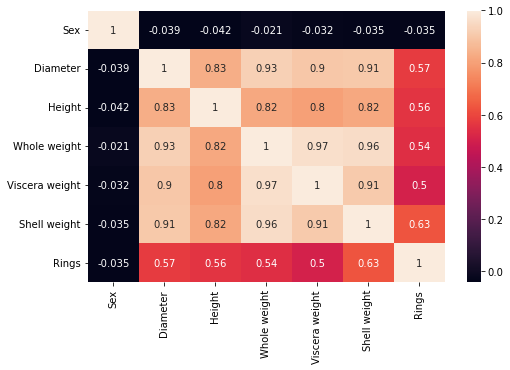

In [59]:
plt.figure(figsize=(8,5))
sns.heatmap(abalone_data.corr(),annot=True)

In [60]:
#Removing outliers

In [61]:
from scipy.stats import zscore
z=np.abs(zscore(abalone_data))
z

,Sex,Diameter,Height,Whole weight,Viscera weight,Shell weight,Rings
0,1.151980,0.432149,1.064424,0.641898,0.726212,0.638217,1.571544
1,1.151980,1.439929,1.183978,1.230277,1.205221,1.212987,0.910013
2,1.280690,0.122130,0.107991,0.309469,0.356690,0.207139,0.289624
3,1.151980,0.432149,0.347099,0.637819,0.607600,0.602294,0.020571
4,0.064355,1.540707,1.423087,1.272086,1.287337,1.320757,0.910013
...,...,...,...,...,...,...,...
4172,1.280690,0.424464,0.609334,0.118813,0.532900,0.073062,0.330765
4173,1.151980,0.323686,0.107991,0.279929,0.309362,0.155685,0.020571
4174,1.151980,0.676409,1.565767,0.708212,0.975413,0.496955,0.289624
4175,1.280690,0.777187,0.250672,0.541998,0.733627,0.410739,0.020571


In [62]:
threshold=3
print(np.where(z>3))

(array([   6,   72,   81,   83,  129,  163,  164,  165,  165,  166,  166,
        167,  168,  170,  181,  232,  236,  236,  237,  238,  270,  275,
        277,  278,  294,  310,  313,  314,  334,  351,  355,  358,  358,
        362,  375,  416,  417,  428,  431,  433,  469,  478,  480,  501,
        526,  530,  572,  628,  673,  674,  675,  678,  694,  696,  719,
        720,  744,  754,  756,  811,  891,  891, 1048, 1051, 1052, 1204,
       1206, 1207, 1207, 1207, 1209, 1257, 1417, 1422, 1427, 1427, 1428,
       1429, 1757, 1759, 1762, 1762, 1763, 1763, 1987, 2051, 2090, 2108,
       2108, 2114, 2157, 2161, 2176, 2180, 2199, 2201, 2208, 2209, 2274,
       2275, 2305, 2334, 2334, 2334, 2335, 2344, 2358, 2368, 2436, 2459,
       2471, 2623, 2624, 2624, 2709, 2710, 2810, 2811, 2811, 2863, 2863,
       3008, 3140, 3148, 3149, 3149, 3151, 3151, 3188, 3193, 3280, 3359,
       3427, 3427, 3599, 3628, 3715, 3715, 3715, 3800, 3837, 3899, 3924,
       3930, 3944, 3996, 4145, 4148], dtype=int64)

In [63]:
z.iloc[6,6]

3.12251641377204

In [64]:
z.shape

(4177, 7)

In [65]:
len(np.where(z>3)[0])

148

In [66]:
# removing outliers
abalone_data_new=abalone_data[(z<3).all(axis=1)]
print("Old Dataframe",abalone_data.shape)
print("New Dataframe",abalone_data_new.shape)
print("total_dropped_rows",abalone_data.shape[0] - abalone_data_new.shape[0])

Old Dataframe (4177, 7)
New Dataframe (4050, 7)
total_dropped_rows 127


In [67]:
#Z score method to get rid of outliers present in our dataset that are not in the acceptable range of +/-3 zscore value.

In [68]:
loss_percent=(4177-4050)/4177*100
print(loss_percent,'%')

3.040459660043093 %


In [69]:
#After removing the outliers we are checking the data loss percentage by comparing the rows in our original data set and the new data set
#3.04% data loss is acceptable.

In [70]:
#Splitting the dataset

In [71]:
x = abalone_data_new.iloc[:,:-1]
y = abalone_data_new.iloc[:,-1]

In [72]:
x.skew()

Sex              -0.098078
Diameter         -0.598478
Height           -0.248237
Whole weight      0.388193
Viscera weight    0.455795
Shell weight      0.365540
dtype: float64

In [73]:
#Since the skewness is almost within permissible ranges and the outlier data are a real value we have proceeded with the x independant variables as it is.

In [74]:
#Scaling the independant variable (x)

In [75]:
sc=StandardScaler()
x1=sc.fit_transform(x)
x1

array([[ 1.15682064, -0.42176554, -1.16116187, -0.63340556, -0.72366849,
        -0.63247034],
       [ 1.15682064, -1.45625586, -1.29557866, -1.25426925, -1.22524216,
        -1.25071252],
       [-1.28652934,  0.14720414, -0.08582761, -0.28262296, -0.33674023,
        -0.1687887 ],
       ...,
       [ 1.15682064,  0.71617382,  1.79600736,  0.79124525,  1.05811226,
         0.58855797],
       [-1.28652934,  0.81962285,  0.31742274,  0.61585395,  0.80493698,
         0.49582164],
       [ 1.15682064,  1.54376608,  1.5271738 ,  2.45369653,  1.90839906,
         2.03369908]])

In [76]:
#We used Standard Scaler method to ensure all independant variables columns have been standardized.

In [77]:
x.columns

x = pd.DataFrame(x1,columns=x.columns)

In [78]:
x

,Sex,Diameter,Height,Whole weight,Viscera weight,Shell weight
0,1.156821,-0.421766,-1.161162,-0.633406,-0.723668,-0.632470
1,1.156821,-1.456256,-1.295579,-1.254269,-1.225242,-1.250713
2,-1.286529,0.147204,-0.085828,-0.282623,-0.336740,-0.168789
3,1.156821,-0.421766,-0.354661,-0.629101,-0.599469,-0.593830
4,-0.064854,-1.559705,-1.564412,-1.298386,-1.311226,-1.366633
...,...,...,...,...,...,...
4045,-1.286529,0.457551,0.720673,0.169306,0.594754,0.132604
4046,1.156821,0.354102,-0.085828,0.339317,0.360686,0.221477
4047,1.156821,0.716174,1.796007,0.791245,1.058112,0.588558
4048,-1.286529,0.819623,0.317423,0.615854,0.804937,0.495822


In [79]:
#Linear Regression model : Finding Best Random State

In [80]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [81]:
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20,random_state=i)
    lr = LinearRegression()
    lr.fit(x_train, y_train)
    pred_train = lr.predict(x_train)
    pred_test = lr.predict(x_test)
    print(f"At random state {i}, the training accuracy is : {r2_score(y_train,pred_train)}")
    print(f"At random state {i}, the testing accuracy is :  {r2_score(y_test,pred_test)}")
    print("\n")

At random state 1, the training accuracy is : 0.4543547223429292
At random state 1, the testing accuracy is :  0.4520215265531826


At random state 2, the training accuracy is : 0.4547751723221597
At random state 2, the testing accuracy is :  0.4481851181430663


At random state 3, the training accuracy is : 0.4534516364797737
At random state 3, the testing accuracy is :  0.45532208374479455


At random state 4, the training accuracy is : 0.45348125036522535
At random state 4, the testing accuracy is :  0.45393086121985027


At random state 5, the training accuracy is : 0.46016217712990537
At random state 5, the testing accuracy is :  0.4262160767739058


At random state 6, the training accuracy is : 0.45688576598348185
At random state 6, the testing accuracy is :  0.4420715102655094


At random state 7, the training accuracy is : 0.4577032853971391
At random state 7, the testing accuracy is :  0.43632701015611786


At random state 8, the training accuracy is : 0.4528417777089069
At ra

In [82]:
#We chose random state 111 since both training and testing accuracy is close by and higher in value compared to others

In [83]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20,random_state=111)

In [84]:
lr.fit(x_train,y_train)

LinearRegression()

In [85]:
pred_test = lr.predict(x_test)
print(r2_score(y_test,pred_test))

0.4592576466121676


In [86]:
#Since the r2_score is low we will try with various other Regressors at random state 111

In [87]:
#Cross Validation of the model

In [88]:
train_accuracy = r2_score(y_train,pred_train)
test_accuracy = r2_score(y_test,pred_test)

for j in range(2,10):
    cv_score = cross_val_score(lr,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean}")
    print(f"accuracy score for training is {train_accuracy}")
    print(f"accuracy score for testing is {test_accuracy}")
    print("\n")

At cross fold 2 the cv score is 0.45034800997599156
accuracy score for training is -0.4253815882535008
accuracy score for testing is 0.4592576466121676


At cross fold 3 the cv score is 0.43452225180600995
accuracy score for training is -0.4253815882535008
accuracy score for testing is 0.4592576466121676


At cross fold 4 the cv score is 0.34690354375792914
accuracy score for training is -0.4253815882535008
accuracy score for testing is 0.4592576466121676


At cross fold 5 the cv score is 0.34819343213987397
accuracy score for training is -0.4253815882535008
accuracy score for testing is 0.4592576466121676


At cross fold 6 the cv score is 0.3576054891731298
accuracy score for training is -0.4253815882535008
accuracy score for testing is 0.4592576466121676


At cross fold 7 the cv score is 0.3670553669653248
accuracy score for training is -0.4253815882535008
accuracy score for testing is 0.4592576466121676


At cross fold 8 the cv score is 0.33270699341954274
accuracy score for trainin

In [89]:
#cv = 7 is chosen since it shows the most cv score while cv value should be usually in the higher range. But the accuracy sccore is below 50% hence we will test with other regressors too.

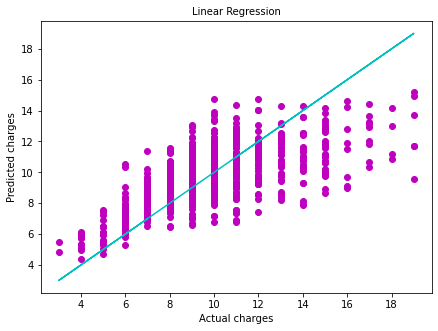

In [90]:
#Drawing the linear regression plot to see the best fit line
plt.figure(figsize=(7,5))
plt.scatter(x=y_test, y=pred_test, color='m')
plt.plot(y_test,y_test,color='c')
plt.xlabel('Actual charges', fontsize=10)
plt.ylabel('Predicted charges', fontsize=10)
plt.title('Linear Regression',fontsize=10)
plt.show()

In [91]:
#The best fit line doesnt seem to be covering more than 50% of the points

In [92]:
def regressor(model, x, y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=111)
    
    # Training the model
    model.fit(x_train, y_train)
    
    # Predicting y_test
    pred = model.predict(x_test)
    
    # Root Mean Square Error (RMSE)
    rmse = mean_squared_error(y_test, pred, squared=False)
    print("Root Mean Square Error is:", rmse)
    
    # R2 score
    r2 = r2_score(y_test, pred, multioutput='variance_weighted')*100
    print("R2 Score is:", r2)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, x, y, cv=5).mean())*100
    print("Cross Validation Score is:", cv_score)
    
    # Result of r2 score - cv score
    result = r2 - cv_score
    print("R2 Score - Cross Validation Score is", result)

In [93]:
#Linear Regression

In [94]:
model=LinearRegression()
regressor(model, x, y)

Root Mean Square Error is: 2.0480132293953295
R2 Score is: 45.92576466121676
Cross Validation Score is: 34.819343213987395
R2 Score - Cross Validation Score is 11.106421447229366


In [95]:
#L1 -- Lasso Regression

In [96]:
model=Lasso(alpha=0.0001)
regressor(model, x, y)

Root Mean Square Error is: 2.048008765073039
R2 Score is: 45.92600040632581
Cross Validation Score is: 34.820009085495485
R2 Score - Cross Validation Score is 11.105991320830327


In [97]:
#L2 -- Ridge Regression

In [98]:
model=Ridge(alpha=0.0001)
regressor(model, x, y)

Root Mean Square Error is: 2.0480132309371593
R2 Score is: 45.925764579798084
Cross Validation Score is: 34.81934272360786
R2 Score - Cross Validation Score is 11.106421856190224


In [99]:
#Elastic Net

In [100]:
model=ElasticNet(alpha=0.0001)
regressor(model, x, y)

Root Mean Square Error is: 2.048014211497105
R2 Score is: 45.9257127998181
Cross Validation Score is: 34.81884518872511
R2 Score - Cross Validation Score is 11.106867611092987


In [101]:
#Support Vector Regression

In [102]:
model=SVR(kernel='rbf')
regressor(model, x, y)

Root Mean Square Error is: 1.9976979940627306
R2 Score is: 48.55009958553169
Cross Validation Score is: 43.260514030725375
R2 Score - Cross Validation Score is 5.289585554806315


In [103]:
model=SVR(kernel='poly')
regressor(model, x, y)

Root Mean Square Error is: 2.2539031771652964
R2 Score is: 34.50692481260227
Cross Validation Score is: 25.709166224838803
R2 Score - Cross Validation Score is 8.797758587763468


In [104]:
model=SVR(kernel='linear')
regressor(model, x, y)

Root Mean Square Error is: 2.0950858933777505
R2 Score is: 43.411453795052246
Cross Validation Score is: 35.74158909545571
R2 Score - Cross Validation Score is 7.669864699596538


In [105]:
#Decision Tree Regressor

In [106]:
model=DecisionTreeRegressor(random_state=111)
regressor(model, x, y)

Root Mean Square Error is: 2.8201217030038057
R2 Score is: -2.532270130035497
Cross Validation Score is: -13.902442771108865
R2 Score - Cross Validation Score is 11.370172641073367


In [107]:
#Random Forest Regressor

In [108]:
model=RandomForestRegressor()
regressor(model, x, y)

Root Mean Square Error is: 1.9864779925322138
R2 Score is: 49.126409778923744
Cross Validation Score is: 38.88241278561987
R2 Score - Cross Validation Score is 10.243996993303874


In [109]:
#K Neighbors Regressor

In [110]:
model=KNeighborsRegressor()
regressor(model, x, y)

Root Mean Square Error is: 2.035487626231909
R2 Score is: 46.585175635454966
Cross Validation Score is: 35.245010473175576
R2 Score - Cross Validation Score is 11.34016516227939


In [111]:
#SGD Regressor

In [112]:
model=SGDRegressor(penalty='l1', learning_rate='optimal')
regressor(model, x, y)

Root Mean Square Error is: 2.157719289750016
R2 Score is: 39.977406101942655
Cross Validation Score is: 31.20459562586668
R2 Score - Cross Validation Score is 8.772810476075975


In [113]:
#Gradient Boosting Regressor

In [114]:
model=GradientBoostingRegressor()
regressor(model, x, y)

Root Mean Square Error is: 1.9772770415389431
R2 Score is: 49.59659004301252
Cross Validation Score is: 40.95559200793738
R2 Score - Cross Validation Score is 8.640998035075135


In [115]:
#Ada Boost Regressor

In [116]:
model=AdaBoostRegressor(random_state=111)
regressor(model, x, y)

Root Mean Square Error is: 2.207468257919332
R2 Score is: 37.17770378528476
Cross Validation Score is: 17.517660474722106
R2 Score - Cross Validation Score is 19.660043310562656


In [117]:
#Extra Trees Regressor

In [118]:
model=ExtraTreesRegressor(n_estimators=200, max_features='sqrt', n_jobs=6)
regressor(model, x, y)

Root Mean Square Error is: 1.975257125003361
R2 Score is: 49.69951813652929
Cross Validation Score is: 39.07154649305148
R2 Score - Cross Validation Score is 10.627971643477814


In [119]:
#Comparing all the above the Support Vector Regressor gives the best results since the R2 Score - Cross Validation Score is 5.289 and at the same time the accuracy is also 48.55%

In [120]:
parameters = {'kernel' : ['poly', 'linear', 'rbf'],
              'C': [2.0, 3.0, 4.0],
              'gamma' : ['scale', 'auto'],
              'epsilon': [0.2, 0.3, 0.4],
              'shrinking' : [True, False]}

In [121]:
GCV = GridSearchCV(SVR(), parameters, cv=5)

In [122]:
#GCV.fit(x_train,y_train)

In [123]:
data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/abalone.csv')

In [124]:
column_names = ["sex", "length", "diameter", "height", "whole weight", 
                "shucked weight", "viscera weight", "shell weight", "rings"]
#data = pd.read_csv("abalone.data", names=column_names)
data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/abalone.csv')
print("Number of samples: %d" % len(data))
data.head()

Number of samples: 4177


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [125]:
for label in "MFI":
    data[label] = data["Sex"] == label
del data["Sex"]

In [126]:
data.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,M,F,I
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,True,False,False
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,True,False,False
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,False,True,False
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,True,False,False
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,False,False,True


In [127]:
y = data.Rings.values

In [128]:
del data["Rings"] # remove rings from data, so we can convert all the dataframe to a numpy 2D array.
X = data.values.astype(np.float)

In [130]:
X.shape

(4177, 10)

In [133]:
y.shape

(4177,)

In [177]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
#x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=111)

In [178]:

from sklearn.tree import DecisionTreeRegressor
# create an estimator, optionally specifying parameters
model = DecisionTreeRegressor()
# fit the estimator to the data
model.fit(X_train, y_train)
# apply the model to the test and training data
predicted_y_test = model.predict(X_test)
predicted_y_train = model.predict(X_train)

In [179]:
def scatter_y(true_y, predicted_y):
    """Scatter-plot the predicted vs true number of rings
    
    Plots:
       * predicted vs true number of rings
       * perfect agreement line
       * +2/-2 number dotted lines

    Returns the root mean square of the error
    """
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.plot(true_y, predicted_y, '.k')
    
    ax.plot([0, 30], [0, 30], '--k')
    ax.plot([0, 30], [2, 32], ':k')
    ax.plot([2, 32], [0, 30], ':k')
    
    rms = (true_y - predicted_y).std()
    
    ax.text(25, 3,
            "Root Mean Square Error = %.2g" % rms,
            ha='right', va='bottom')

    ax.set_xlim(0, 30)
    ax.set_ylim(0, 30)
    
    ax.set_xlabel('True number of rings')
    ax.set_ylabel('Predicted number of rings')
    
    return rms

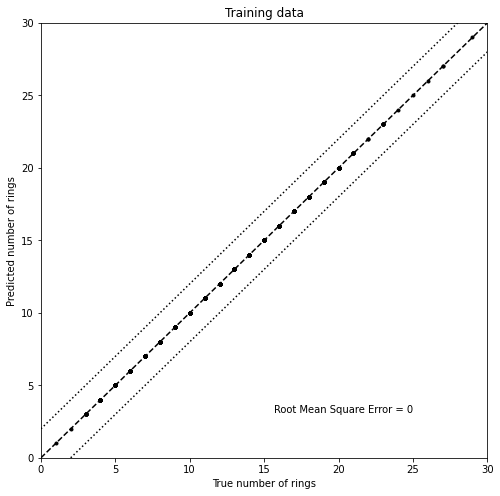

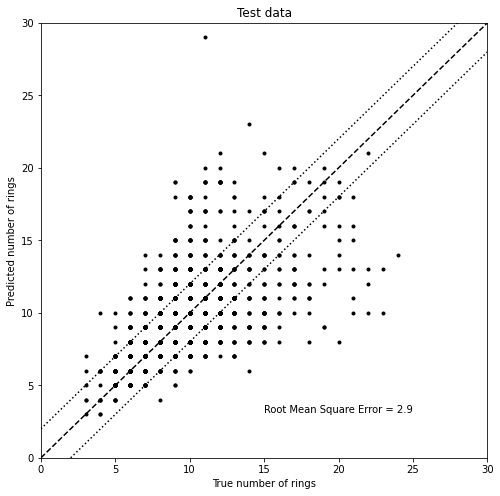

In [180]:
scatter_y(y_train, predicted_y_train)
plt.title("Training data")
scatter_y(y_test, predicted_y_test)
plt.title("Test data");

In [183]:
model = DecisionTreeRegressor(max_depth=10)
# fit the estimator to the data
model.fit(train_X, train_y)
# apply the model to the test and train data
predicted_test_y = model.predict(test_X)
predicted_train_y = model.predict(train_X)

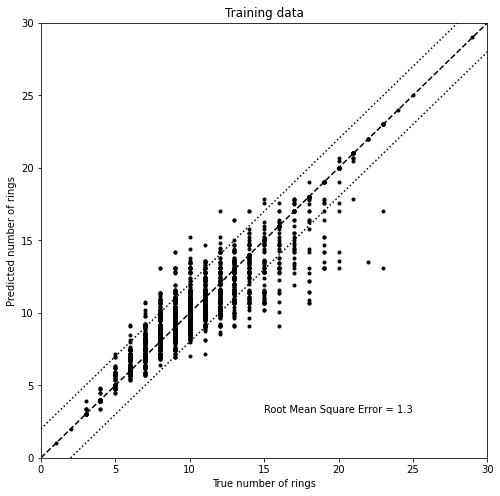

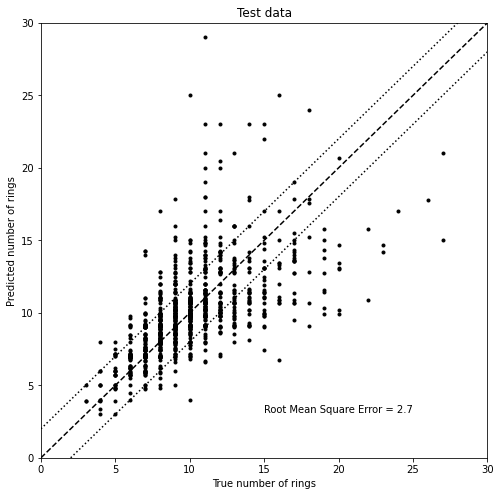

In [184]:
scatter_y(train_y, predicted_train_y)
plt.title("Training data")
rms_decision_tree = scatter_y(test_y, predicted_test_y)
plt.title("Test data");

In [185]:
data_percentage_array = np.linspace(10, 100, 10)

In [186]:
train_error = []
test_error = []
for data_percentage in data_percentage_array:
    model = DecisionTreeRegressor(max_depth=10)
    number_of_samples = int(data_percentage / 100. * len(train_y))
    model.fit(train_X[:number_of_samples,:], train_y[:number_of_samples])

    predicted_train_y = model.predict(train_X)
    predicted_test_y = model.predict(test_X)

    train_error.append((predicted_train_y - train_y).std())
    test_error.append((predicted_test_y - test_y).std())

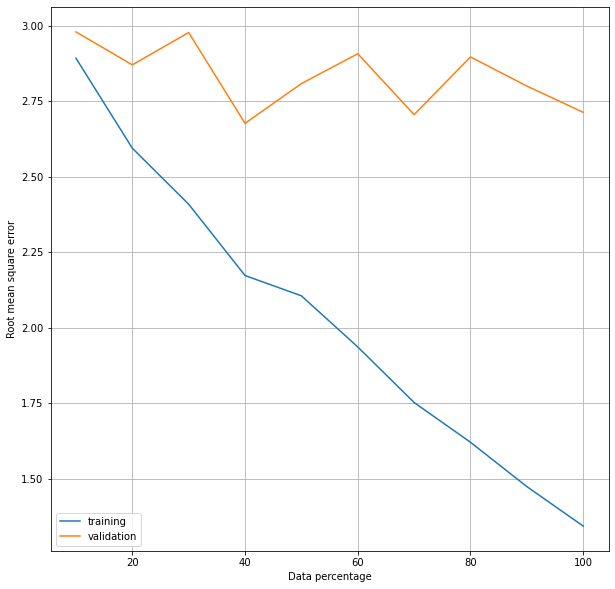

In [187]:
plt.plot(data_percentage_array, train_error, label='training')
plt.plot(data_percentage_array, test_error, label='validation')
plt.grid()
plt.legend(loc=3)
plt.xlabel('Data percentage')
plt.ylabel('Root mean square error');

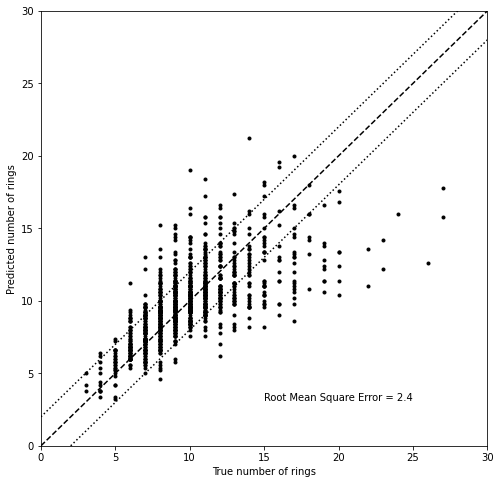

In [188]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=5)
model.fit(train_X, train_y)
predicted_test_y = model.predict(test_X)
rms_random_forest = scatter_y(test_y, predicted_test_y)

In [191]:
print("Root Mean Square error decreases from %.2g to %.2g." % (rms_decision_tree, rms_random_forest))

Root Mean Square error decreases from 2.7 to 2.4.


In [192]:
model = RandomForestRegressor(n_estimators=100)

In [193]:
n_features = X.shape[1]

In [195]:
from sklearn.model_selection import RandomizedSearchCV
grid = RandomizedSearchCV(model, n_iter=20, 
            param_distributions=dict(
                                          max_depth=np.arange(5,20+1), 
                                          max_features=np.arange(1, n_features+1)
                                    )
         )
grid.fit(X, y)
print(grid.best_params_)

{'max_features': 4, 'max_depth': 11}


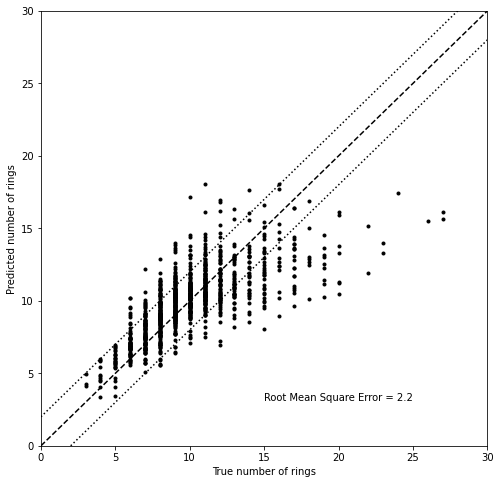

In [196]:
model = RandomForestRegressor(max_features=grid.best_params_["max_features"],
                              max_depth=grid.best_params_["max_depth"])
model.fit(train_X, train_y)
predicted_test_y = model.predict(test_X)
rms_optimized_random_forest = scatter_y(test_y, predicted_test_y)

In [197]:
print("Root Mean Square error decreases from %.2g to %.2g." % (rms_random_forest, rms_optimized_random_forest))

Root Mean Square error decreases from 2.4 to 2.2.
